# Autoencoder
- Sara Echeverría 21371
- Ricardo Mendez 21289

Repository link: https://github.com/bl33h/autoencoder

## Data management (Part I)

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load the data into a dataframe
data = pd.read_csv('data/UK_foods.csv')

# display the first few rows ¡
print("first few rows of the dataset:")
print(data.head())

# display descriptive statistics for each column
print("\ndescriptive statistics:")
print(data.describe())

# check for any missing values in the dataset
print("\nmissing values in each column:")
print(data.isnull().sum())

# get information 
print("\ndata types and non-null counts:")
print(data.info())

first few rows of the dataset:
       Unnamed: 0  England  Wales  Scotland  N.Ireland
0          Cheese      105    103       103         66
1   Carcass_meat       245    227       242        267
2     Other_meat       685    803       750        586
3            Fish      147    160       122         93
4  Fats_and_oils       193    235       184        209

descriptive statistics:
           England        Wales     Scotland    N.Ireland
count    17.000000    17.000000    17.000000    17.000000
mean    469.647059   503.941176   460.235294   429.941176
std     452.701466   463.859282   469.595907   479.896014
min      54.000000    64.000000    53.000000    41.000000
25%     156.000000   175.000000   147.000000   135.000000
50%     253.000000   265.000000   242.000000   209.000000
75%     685.000000   803.000000   566.000000   586.000000
max    1472.000000  1582.000000  1572.000000  1506.000000

missing values in each column:
Unnamed: 0    0
England       0
Wales         0
Scotland    

In [3]:
scaler = MinMaxScaler()
dataScaled = data.copy() 
dataScaled[data.columns[1:]] = scaler.fit_transform(data.iloc[:, 1:])

# display the first few rows of the scaled data
print("\nfirst few rows of the scaled dataset:")
print(dataScaled.head())

# display descriptive statistics for the scaled data
print("\ndescriptive statistics of scaled data:")
print(dataScaled.describe())


first few rows of the scaled dataset:
       Unnamed: 0   England     Wales  Scotland  N.Ireland
0          Cheese  0.035966  0.025692  0.032916   0.017065
1   Carcass_meat   0.134697  0.107378  0.124424   0.154266
2     Other_meat   0.444993  0.486825  0.458855   0.372014
3            Fish  0.065585  0.063241  0.045425   0.035495
4  Fats_and_oils   0.098025  0.112648  0.086241   0.114676

descriptive statistics of scaled data:
         England      Wales   Scotland  N.Ireland
count  17.000000  17.000000  17.000000  17.000000
mean    0.293122   0.289816   0.268094   0.265489
std     0.319254   0.305573   0.309148   0.327574
min     0.000000   0.000000   0.000000   0.000000
25%     0.071932   0.073123   0.061883   0.064164
50%     0.140339   0.132411   0.124424   0.114676
75%     0.444993   0.486825   0.337722   0.372014
max     1.000000   1.000000   1.000000   1.000000


## Building the autoencoder (Part II)

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174 (696.00 B)

 Trainable params: 174 (696.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.1544 - val_loss: 0.1420
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1554 - val_loss: 0.1416
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1298 - val_loss: 0.1411
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1436 - val_loss: 0.1406
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1381 - val_loss: 0.1402
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1512 - val_loss: 0.1397
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1382 - val_loss: 0.1392
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1365 - val_loss: 0.1387
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1492 - val_loss: 0.1382
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1339 - val_loss: 0.1377
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1372 - val_loss: 0.1373
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1444 - val_loss: 0.1367
E

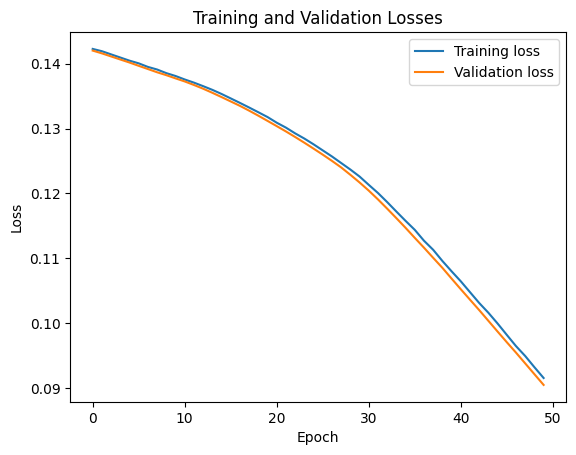

In [5]:
# extract the numerical data for training
trainingData = dataScaled.iloc[:, 1:].values

# architecture
inputSize = trainingData.shape[1]
inputLayer = layers.Input(shape=(inputSize,))

# encoder part
encoded = layers.Dense(8, activation='relu')(inputLayer)
encoded = layers.Dense(4, activation='relu')(encoded)
bottleneck = layers.Dense(2, activation='relu')(encoded)

# decoder part
decoded = layers.Dense(4, activation='relu')(bottleneck)
decoded = layers.Dense(8, activation='relu')(decoded)
outputLayer = layers.Dense(inputSize, activation='sigmoid')(decoded)

# build
autoencoder = models.Model(inputLayer, outputLayer)
autoencoder.summary()

# compile ¡
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# train
history = autoencoder.fit(trainingData, trainingData,
                          epochs=50,
                          batch_size=5,
                          shuffle=True,
                          validation_data=(trainingData, trainingData))

# evaluate the performance
finalLoss = autoencoder.evaluate(trainingData, trainingData)
print("-> final reconstruction loss:", finalLoss)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## Dimensionality reduction and visualization (Part III)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


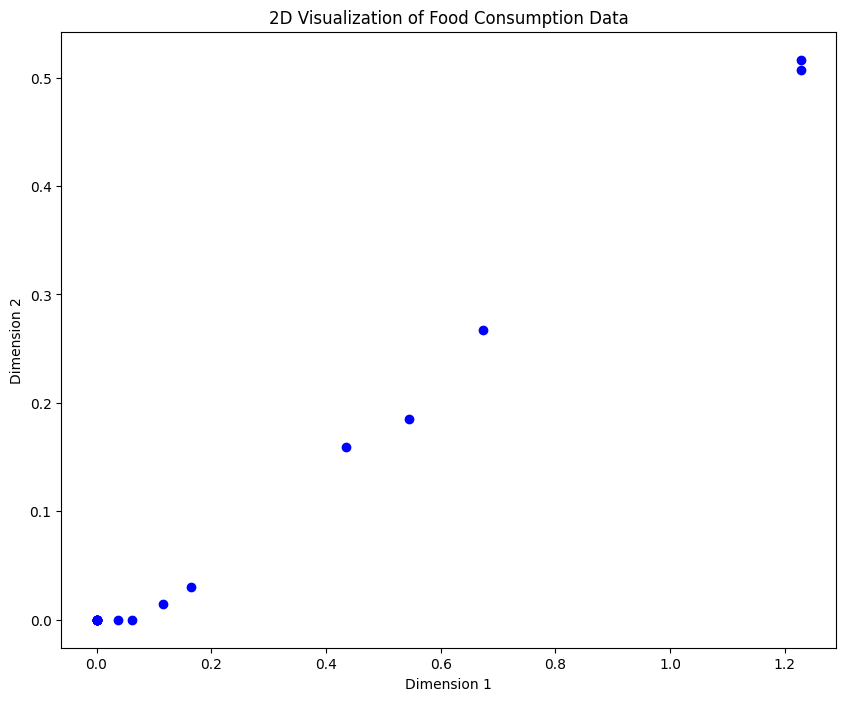

In [6]:
# extracting the encoder part from the full autoencoder
encoder_model = models.Model(inputs=inputLayer, outputs=bottleneck)

# reducing dimensions of the full dataset
reduced_data = encoder_model.predict(trainingData)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue')
plt.title('2D Visualization of Food Consumption Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

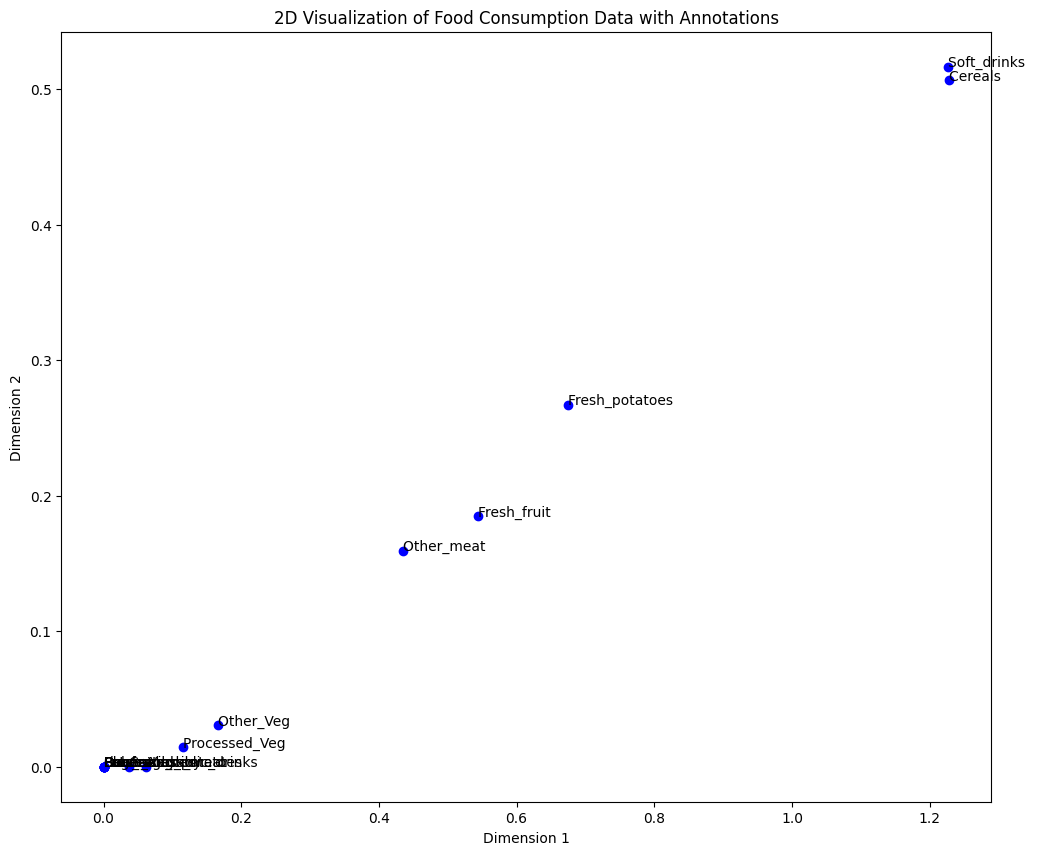

In [7]:
plt.figure(figsize=(12, 10))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue')
for i, txt in enumerate(data['Unnamed: 0']):
    plt.annotate(txt, (reduced_data[i, 0], reduced_data[i, 1]))
plt.title('2D Visualization of Food Consumption Data with Annotations')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## Questions (Part IV)

### ¿Qué podemos aprender sobre los patrones de consumo de alimentos en los cuatro países del Reino Unido?
Los diagramas expuestos anteriormente muestran los diversos grupos de alimentos en los países del Reino Unido, donde los "refrescos" y "cereales" se agrupan, indicando una preferencia por alimentos procesados. Por otro lado, los alimentos frescos como las frutas se manifiestan más dispersos. Esto refleja las diferencias de consumo en esta región, sugiriendo tendencias dietéticas particulares para los elementos más aislados.

### ¿El autocodificador hizo un buen trabajo al reducir la dimensionalidad? ¿Qué métricas de rendimiento apoyan su afirmación?
Sí, el autocodificador redujo las dimensiones y logró capturar patrones de consumo de manera exitosa. Es posible afirmar esto gracias los valores situados en la parte de la construcción del autoencoder, específicamente a la constante disminución de "loss" durante el entrenamiento del modelo y en la validación. Asimismo, se pueden visualizar alimentos similares de forma agrupada, por lo que la reconstrucción fue precisa.